In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


# Explorative analysis

In [104]:
data = pd.read_csv("penguins_lter.csv")
colnames = list(data.select_dtypes(["number"]).columns)

species = data["Species"]
islands = data["Island"]
cl = data["Culmen Length (mm)"]
cd = data["Culmen Depth (mm)"]
fl = data["Flipper Length (mm)"]
bm = data["Body Mass (g)"]
dc = data["Delta 13 C (o/oo)"]
dn = data["Delta 15 N (o/oo)"]

unique_species = species.unique()

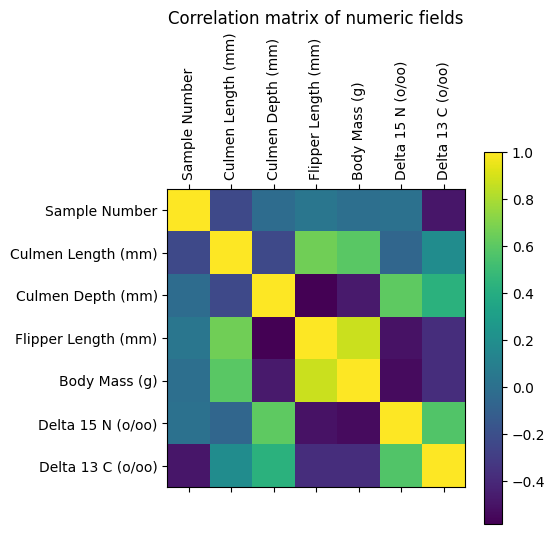

In [105]:
plt.matshow(data.corr(numeric_only=True))
plt.title("Correlation matrix of numeric fields")
plt.colorbar()
plt.xticks(range(7),colnames, rotation=90)
plt.yticks(range(7),colnames)
plt.show()

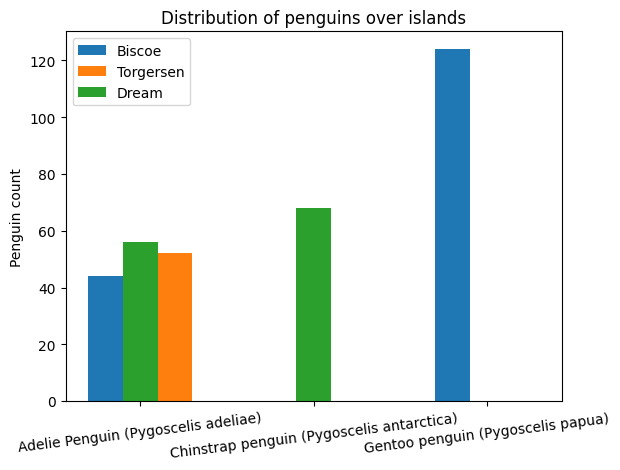

In [106]:
biscoe = data.loc[data["Island"] == "Biscoe"]["Species"].value_counts().to_dict()
torgersen = data.loc[data["Island"] == "Torgersen"]["Species"].value_counts().to_dict()
dream = data.loc[data["Island"] == "Dream"]["Species"].value_counts().to_dict()

# fill 0 for missing values
for island in (biscoe, torgersen, dream):
    for sp in unique_species:
        if not sp in island:
            island[sp] = 0
    
biscoe = dict(sorted(biscoe.items()))
torgersen = dict(sorted(torgersen.items()))
dream = dict(sorted(dream.items()))

x = np.arange(len(unique_species))  # the label locations
width = 0.2  # the width of the bars

plt.title("Distribution of penguins over islands")

plt.bar(x-width, biscoe.values(), width, label="Biscoe")
plt.bar(x+width, torgersen.values(), width, label="Torgersen")
plt.bar(x, dream.values(), width, label="Dream")

plt.xticks(x, unique_species, rotation=7)
plt.ylabel("Penguin count")
plt.legend()
plt.show()

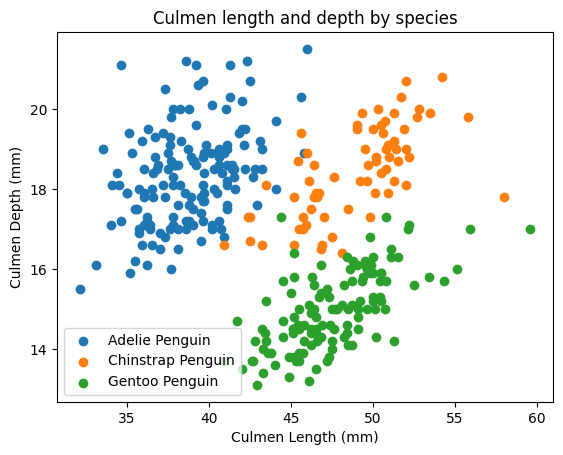

In [107]:
adelie = data.loc[data["Species"] == "Adelie Penguin (Pygoscelis adeliae)"]
chinstrap = data.loc[data["Species"] == "Chinstrap penguin (Pygoscelis antarctica)"]
gentoo = data.loc[data["Species"] == "Gentoo penguin (Pygoscelis papua)"]

adelie_cl = adelie["Culmen Length (mm)"]
chinstrap_cl = chinstrap["Culmen Length (mm)"]
gentoo_cl = gentoo["Culmen Length (mm)"]

adelie_cd = adelie["Culmen Depth (mm)"]
chinstrap_cd = chinstrap["Culmen Depth (mm)"]
gentoo_cd = gentoo["Culmen Depth (mm)"]

plt.title("Culmen length and depth by species")
plt.scatter(adelie_cl, adelie_cd, label="Adelie Penguin")
plt.scatter(chinstrap_cl, chinstrap_cd, label="Chinstrap Penguin")
plt.scatter(gentoo_cl, gentoo_cd, label="Gentoo Penguin")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.legend()
plt.show()

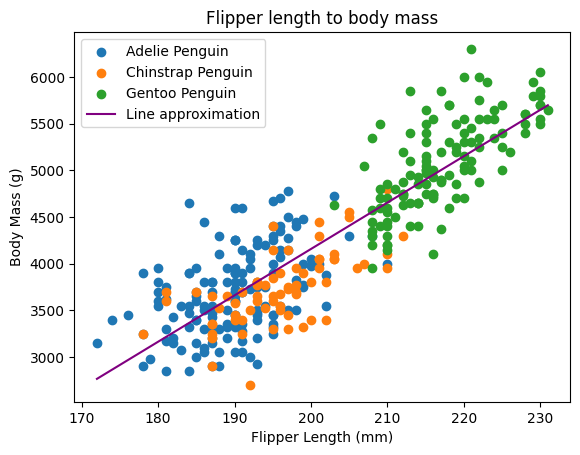

In [108]:
adelie_fl = adelie["Flipper Length (mm)"]
chinstrap_fl = chinstrap["Flipper Length (mm)"]
gentoo_fl = gentoo["Flipper Length (mm)"]

adelie_bm = adelie["Body Mass (g)"]
chinstrap_bm = chinstrap["Body Mass (g)"]
gentoo_bm = gentoo["Body Mass (g)"]

fl_max = fl.max()
fl_min = fl.min()
bm_max = bm.max()
bm_min = bm.min()

# y = mx + c
m, c = np.polyfit(fl[~fl.isnull()], bm[~bm.isnull()], 1)
y1 = m* fl_min + c
y2 = m* fl_max + c


plt.title("Flipper length to body mass")
plt.scatter(adelie_fl, adelie_bm, label="Adelie Penguin")
plt.scatter(chinstrap_fl, chinstrap_bm, label="Chinstrap Penguin")
plt.scatter(gentoo_fl, gentoo_bm, label="Gentoo Penguin")

plt.plot([fl_min, fl_max], [y1, y2], color="purple", label="Line approximation")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend()
plt.show()

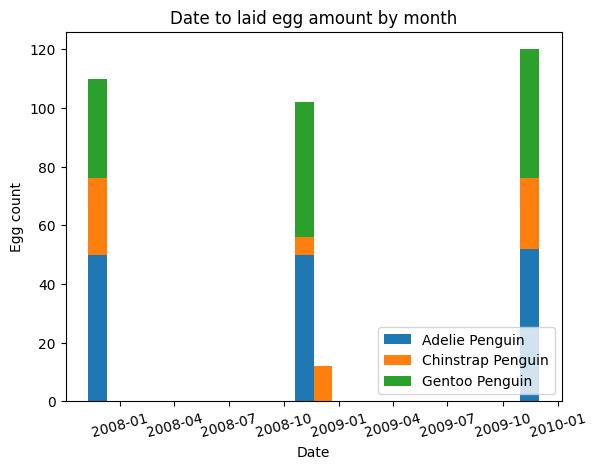

In [109]:
aegg = [dt.datetime.strptime(d,"%m/%d/%y").date() for d in adelie["Date Egg"]]
cegg = [dt.datetime.strptime(d,"%m/%d/%y").date() for d in chinstrap["Date Egg"]]
gegg = [dt.datetime.strptime(d,"%m/%d/%y").date() for d in gentoo["Date Egg"]]

plt.title("Date to laid egg amount by month")
plt.hist([aegg, cegg, gegg], 24, histtype="barstacked", label=["Adelie Penguin", "Chinstrap Penguin", "Gentoo Penguin"])
plt.xticks(rotation=15)
plt.ylabel("Egg count")
plt.xlabel("Date")
plt.legend(loc="lower right")
plt.show()

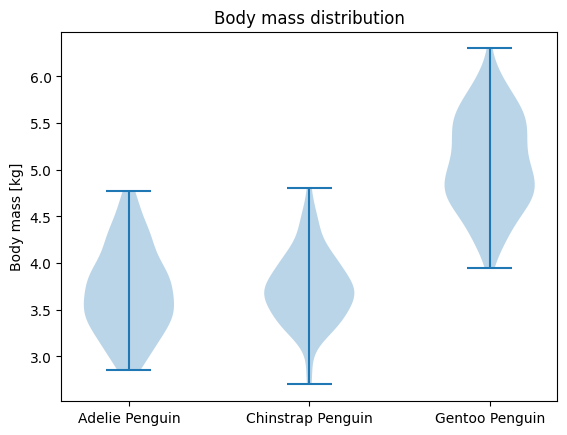

In [110]:
aw = adelie["Body Mass (g)"]
cw = chinstrap["Body Mass (g)"]
gw = gentoo["Body Mass (g)"]

aw = aw[~aw.isnull()]/1000
cw = cw[~cw.isnull()]/1000
gw = gw[~gw.isnull()]/1000

plt.title("Body mass distribution")
plt.violinplot([aw, cw, gw])
plt.xticks([1,2,3],labels=["Adelie Penguin", "Chinstrap Penguin", "Gentoo Penguin"])
plt.ylabel("Body mass [kg]")
plt.show()
